In [3]:
from netCDF4 import Dataset
import numpy as np

In [4]:
predictor2file = {'airTemp':'tas.nc', 'precip':'pr.nc', 'downwardLongwave':'rlns.nc', \
                  'downwardShortwave':'rsds.nc', 'plantAvailableWater':'paw.nc'}
# where is relative humidity?
predictors = {k:Dataset(v)['var1'][...].squeeze() for k,v in predictor2file.items()}
targetFile = 'jedi_output.nc'
targetVariable = 'NPP'
target = Dataset( targetFile)[targetVariable][...].squeeze()
landSeaMask = Dataset('landsea.nc')['var1'][...].squeeze()

# an example of making annual means
precip = predictors['precip']
annualMeanPrecip = precip.reshape((-1, 12, precip.shape[1], precip.shape[2])).mean( axis=1)

In [5]:
airTemp = 'tas.nc'
netLongRadiantionFlux = 'rlns.nc'
shortwaveRadiation = 'rsds.nc'
precipitation = 'pr.nc'
output = 'jedi_output.nc'

landSeaMask = 'landsea.nc'
lantitude =  'latitude.nc'
longitude = 'longitude.nc'
elevation = 'elevation.nc'
moisture = 'paw.nc'
spatialMetaData = 'globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['var1'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['var1'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['var1'][:].squeeze()
precipitationArray = precipitationDataSet['var1'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['var1'][:].squeeze()
longitudeArray = longitudeDataset['var1'][:].squeeze()
elevationArray = elevationDataset['var1'][:].squeeze()
moistureArray = moistureDataset['var1'][:].squeeze()
spatialMetaDataArray = spatialMetaData[:]



In [6]:
print('airTempArray'+str(np.shape(airTempArray)))
print('netLongRadiantionFluxArray'+str(np.shape(netLongRadiantionFluxArray)))
print('shortwaveRadiationArray'+str(np.shape(shortwaveRadiationArray)))
print('precipitationArray'+str(np.shape(precipitationArray)))
print('NPPArray'+str(np.shape(NPPArray)))
print('landSeaMaskArray'+str(np.shape(landSeaMaskArray)))
print('lantitudeArray'+str(np.shape(lantitudeArray)))
print('longitudeArray'+str(np.shape(longitudeArray)))
print('elevationArray'+str(np.shape(elevationArray)))
print('moistureArray'+str(np.shape(moistureArray)))
print('spatialMetaDataArray'+str(np.shape(spatialMetaDataArray)))

airTempArray(288, 51, 60)
netLongRadiantionFluxArray(288, 51, 60)
shortwaveRadiationArray(288, 51, 60)
precipitationArray(288, 51, 60)
NPPArray(288, 51, 60)
landSeaMaskArray(51, 60)
lantitudeArray(51, 60)
longitudeArray(51, 60)
elevationArray(51, 60)
moistureArray(51, 60)
spatialMetaDataArray()


In [7]:
####对于static data 的处理
import pandas as pd
landSeaMaskArray_flatten = landSeaMaskArray.reshape(51*60)
lantitudeArray_flatten = lantitudeArray.reshape(51*60)
longitudeArray_flatten = longitudeArray.reshape(51*60)
elevationArray_flatten = elevationArray.reshape(51*60)
moistureArray_flatten = moistureArray.reshape(51*60)
geo_attri_multi = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))).repeat(repeats=5,axis=0)
geo_attri = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten)))
static_data = pd.DataFrame(geo_attri_multi)
static_data_non_multi = pd.DataFrame(geo_attri)
static_data = static_data.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})
static_data_non_multi= static_data_non_multi.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})


In [8]:
pd.DataFrame(np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))))

,0,1,2,3,4
0,0.0,5.25,-79.75,-3287.0,0.105
1,0.0,5.25,-79.25,-3317.0,0.105
2,0.0,5.25,-78.75,-3091.0,0.105
3,0.0,5.25,-78.25,-3470.0,0.105
4,0.0,5.25,-77.75,-1985.0,0.105
...,...,...,...,...,...
3055,1.0,-19.75,-52.25,370.0,0.060
3056,1.0,-19.75,-51.75,494.0,0.060
3057,1.0,-19.75,-51.25,423.0,0.060
3058,1.0,-19.75,-50.75,391.0,0.075


In [9]:
###对于time series data 的处理
airTempArray_flatten= airTempArray.reshape(288*51*60)
netLongRadiantionFluxArray_flatten= netLongRadiantionFluxArray.reshape(288*51*60)
shortwaveRadiationArray_flatten= shortwaveRadiationArray.reshape(288*51*60)
precipitationArray_flatten= precipitationArray.reshape(288*51*60)
NPPArray_flatten= NPPArray.reshape(288*51*60)
geo_data = np.array(list(zip(airTempArray_flatten,netLongRadiantionFluxArray_flatten,shortwaveRadiationArray_flatten,precipitationArray_flatten,NPPArray_flatten))).reshape(288,51*60*5)
time_series = pd.DataFrame(geo_data).stack().unstack(0)

c:\Users\new\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import sys


In [63]:
time_series

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,299.441772,299.621918,298.686707,299.172485,3.005939e+02,300.861511,300.654053,300.689850,300.268799,299.935455,...,298.703125,300.162720,301.208069,300.701416,300.734131,300.299530,300.312042,300.087555,299.646790,300.570953
1,-47.922852,-47.375977,-46.934570,-45.581055,-4.865430e+01,-46.201172,-47.810547,-48.041992,-41.854492,-41.691406,...,-33.360352,-41.427734,-42.692383,-40.418945,-40.124023,-42.329102,-36.887695,-38.923828,-39.163086,-42.825195
2,245.269943,254.484833,260.606354,257.055084,2.340258e+02,197.385056,221.810410,254.881668,195.145950,214.027267,...,234.283875,247.658569,223.247070,180.486404,206.152634,225.392441,223.165619,212.025772,202.380325,215.558350
3,0.000015,0.000019,0.000005,0.000011,9.414004e-05,0.000256,0.000120,0.000056,0.000219,0.000131,...,0.000003,0.000040,0.000115,0.000225,0.000186,0.000116,0.000133,0.000153,0.000132,0.000064
5,299.033081,298.468750,297.494385,298.712219,3.000842e+02,300.567017,300.199036,300.121094,299.811218,299.442993,...,297.473816,298.838074,300.608093,300.501221,300.581482,300.041321,299.840637,299.911194,299.572754,300.228210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,297.561340,296.657837,296.701965,293.366577,2.929839e+02,290.729492,290.796082,291.669495,294.330078,296.216431,...,298.889709,295.534119,294.315857,292.554626,291.727478,291.485840,296.544495,301.662415,300.805542,302.103027
15296,-44.703125,-50.218750,-34.968750,-55.148438,-5.973438e+01,-41.273438,-31.835938,-53.109375,-47.335938,-45.601562,...,-42.007812,-47.921875,-56.937500,-46.804688,-55.710938,-67.195312,-80.414062,-77.945312,-73.203125,-62.742188
15297,241.482819,260.075012,183.483810,220.049591,2.017787e+02,129.157715,120.446930,180.875443,202.098740,234.257217,...,230.994064,201.343353,192.417953,149.918839,166.799271,203.676865,242.964050,286.565033,294.562408,295.242523
15298,0.000105,0.000042,0.000122,0.000029,4.135731e-07,0.000033,0.000026,0.000023,0.000025,0.000054,...,0.000077,0.000024,0.000008,0.000041,0.000005,0.000014,0.000016,0.000041,0.000060,0.000042


In [64]:
static_data

,landSea,lantitude,longitude,elevation,moisture
0,0.0,5.25,-79.75,-3287.0,0.105
1,0.0,5.25,-79.75,-3287.0,0.105
2,0.0,5.25,-79.75,-3287.0,0.105
3,0.0,5.25,-79.75,-3287.0,0.105
4,0.0,5.25,-79.75,-3287.0,0.105
...,...,...,...,...,...
15295,1.0,-19.75,-50.25,421.0,0.075
15296,1.0,-19.75,-50.25,421.0,0.075
15297,1.0,-19.75,-50.25,421.0,0.075
15298,1.0,-19.75,-50.25,421.0,0.075


In [10]:
output_data = pd.concat([static_data,time_series],axis=1)
output_data['feature_name'] = ['airTemp','netLongRadiantionFlux','shortwaveRadiation','precipitation','NPP']*51*60
output_data = output_data.set_index(['landSea','lantitude','longitude','elevation','moisture','feature_name']).transpose().set_index(pd.date_range('1/1/2006', periods=288, freq='M'))

In [68]:
output_data = pd.concat([static_data,time_series],axis=1)
output_data['feature_name'] = ['airTemp','netLongRadiantionFlux','shortwaveRadiation','precipitation','NPP']*51*60

# output_data = output_data.set_index(['landSea','lantitude','longitude','elevation','moisture','feature_name']).transpose().set_index(pd.date_range('1/1/2006', periods=288, freq='M'))

In [14]:
col = tuple(static_data_non_multi.iloc[1000].values.tolist())
ii=output_data[col]
ii

c:\Users\new\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2858: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


feature_name,airTemp,netLongRadiantionFlux,shortwaveRadiation,precipitation,NPP
2006-01-31,299.449463,-38.500000,207.465820,0.000082,0.000000
2006-02-28,299.462402,-36.382812,211.168594,0.000098,0.000000
2006-03-31,299.713074,-39.390625,212.445831,0.000081,0.000000
2006-04-30,299.278137,-35.359375,189.878799,0.000171,0.000000
2006-05-31,299.253113,-41.156250,194.833786,0.000079,0.000000
...,...,...,...,...,...
2029-08-31,299.671936,-44.695312,218.591568,0.000067,3.329144
2029-09-30,301.682739,-45.578125,242.411591,0.000069,3.518151
2029-10-31,302.309326,-44.632812,247.985336,0.000062,3.586795
2029-11-30,301.145813,-43.460938,219.310150,0.000073,3.286577


In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from datetime import datetime   
import numpy as np
import statsmodels.api as sm     
from statsmodels.tsa.stattools import adfuller  
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA  

In [18]:
ii.index

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2029-03-31', '2029-04-30', '2029-05-31', '2029-06-30',
               '2029-07-31', '2029-08-31', '2029-09-30', '2029-10-31',
               '2029-11-30', '2029-12-31'],
              dtype='datetime64[ns]', length=288, freq='M')

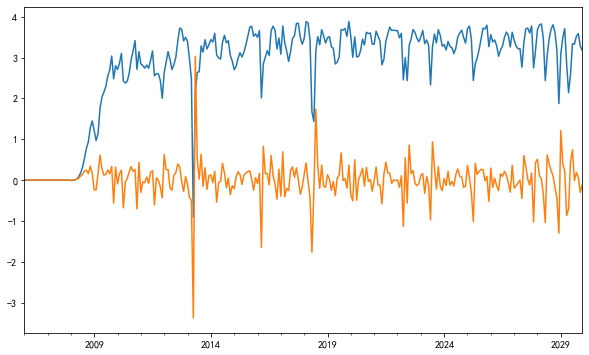

In [22]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']    
plt.rcParams['axes.unicode_minus'] = False      
ii["NPP"].plot()
ii["NPP"].diff(1).plot()


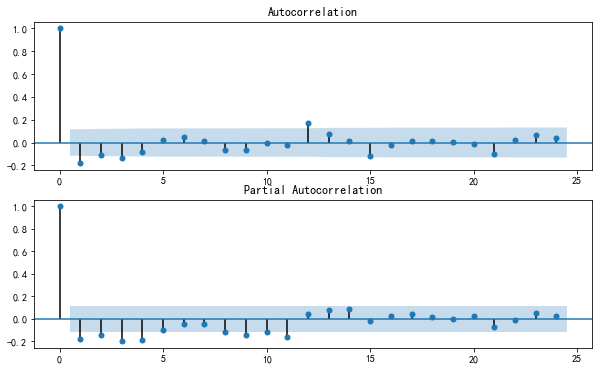

In [27]:
#ARIMA模型分析：
#ACF and PACF graph
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ii["NPP"].diff(1).iloc[1:].dropna(),lags=24,ax=ax1) # 注意：要去掉第1个空值                             
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ii["NPP"].diff(1).iloc[1:].dropna(),  lags=24,ax=ax2)# 注意：要去掉第1个空值



In [33]:
# ADF test for the stationary 
temp = np.array(ii["NPP"].diff(1).iloc[1:])
t = adfuller(temp)  
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output


,value
Test Statistic Value,-8.8475
p-value,1.60587e-14
Lags Used,10
Number of Observations Used,276
Critical Value(1%),-3.45427
Critical Value(5%),-2.87207
Critical Value(10%),-2.57238


In [34]:
# white noise test for the data to find whether the data is meaningful 
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(ii["NPP"].diff(1).iloc[1:], lags=1)) 
# the lower p-value means that we reject the H0 which is the data is white noise

(array([9.48803912]), array([0.00206816]))


c:\Users\new\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [53]:
# find q and p
pmax = int(len(ii["NPP"].diff(1).iloc[1:]) / 10)    #normally q and p will no greater than  length /10
qmax = int(len(ii["NPP"].diff(1).iloc[1:]) / 10)
bic_matrix = []
for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            temp.append(ARIMA(ii["NPP"].diff(1).iloc[1:], (p, 1, q)).fit().bic)
        except:
            temp.append(None)
        bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)
bic_matrix.fillna(bic_matrix.max(),inplace=True)   
p,q = bic_matrix.stack().idxmin()   
print(u'q and p with minmument BIC：%s,%s' %(p,q))  #  use BIC to find the best q and p 



c:\Users\new\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\Users\new\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\Users\new\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\Users\new\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\Users\new\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarnin

BIC 最小的p值 和 q 值：0,4


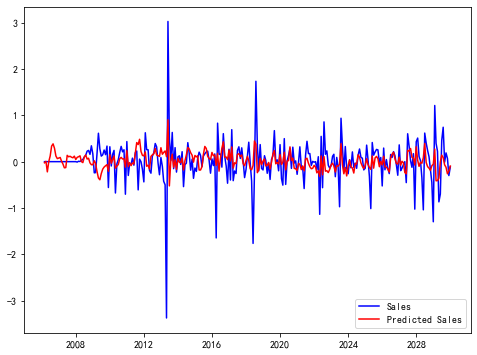

In [196]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
#建立ARIMA模型
model=sm.tsa.ARMA(ii["NPP"].diff(1).iloc[1:].dropna(),(0,1,4),exog=ii.iloc[1:, ii.columns != "NPP"].values).fit(method='css') #使用最小二乘，‘mle’是极大似然估计
#画图比较一下预测值和真实观测值之间的关系
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(ii["NPP"].diff(1).iloc[1:],color='blue',label='Sales')
ax.plot(model.fittedvalues,color='red',label='Predicted Sales')
plt.legend(loc='lower right')



In [195]:
# 模型参数估计及检验：
model=sm.tsa.ARMA(ii["NPP"].diff(1).iloc[1:].dropna(),(0,1,4),exog=ii.iloc[1:, ii.columns != "NPP"].values).fit(method='css') #使用最小二乘，‘mle’是极大似然估计
params=model.params
tvalues=model.tvalues
pvalues=model.pvalues
result_mat=pd.DataFrame({'Estimate':params,'t-values':tvalues,'pvalues':pvalues})
print(result_mat)  # 注意：这里得到的是-θ的结果（Xt=at-θ1a(t-1)-θ2a(t-2)）。从t值来看是显著的。
    
print('AIC is '+str(model.aic))
print('estimator of variance：%f' %model.sigma2)


              Estimate  t-values   pvalues
const        40.954358  3.656638  0.000256
x1           -0.138827 -3.624075  0.000290
x2           -0.010384 -1.109138  0.267371
x3            0.002101  0.796460  0.425765
x4        -2314.106987 -1.606957  0.108064
ma.L1.NPP    -0.286562 -3.600625  0.000317
AIC is 339.3995892358313
estimator of variance：0.181940


In [163]:
model = ARIMA(ii["NPP"].diff(1).iloc[1:].dropna(),exog=ii.iloc[1:, ii.columns != "NPP"].values,order = (0,1,4)).fit()
model.summary2()        


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
=====================================================================
Model:               ARIMA            BIC:                 439.7962  
Dependent Variable:  D.NPP            Log-Likelihood:      -191.62   
Date:                2022-08-25 04:41 Scale:               1.0000    
No. Observations:    286              Method:              css-mle   
Df Model:            9                Sample:              03-31-2006
Df Residuals:        277                                   12-31-2029
Converged:           1.0000           S.D. of innovations: 0.471     
No. Iterations:      7.0000           HQIC:                417.891   
AIC:                 403.2363                                        
---------------------------------------------------------------------
              Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
---------------------------------------------------------------------
const          13.1631   1.9799   6.6484 0.0000     9.2826    17.0435
x1             -0.0398   0.0065  -6.1132 0.0000    -0.0526    -0.0270
x2              0.0074   0.0043   1.7177 0.0859    -0.0010     0.0158
x3             -0.0029   0.0011  -2.7769 0.0055    -0.0050    -0.0009
x4          -3201.2089 839.1551  -3.8148 0.0001 -4845.9228 -1556.4951
ma.L1.D.NPP    -1.0857   0.0640 -16.9655 0.0000    -1.2112    -0.9603
ma.L2.D.NPP     0.1371   0.0894   1.5332 0.1252    -0.0382     0.3124
ma.L3.D.NPP     0.0299   0.0908   0.3289 0.7422    -0.1481     0.2079
ma.L4.D.NPP     0.0995   0.0554   1.7967 0.0724    -0.0090     0.2079
------------------------------------------------------------------------------
                  Real           Imaginary          Modulus          Frequency
------------------------------------------------------------------------------
MA.1             1.2050            -0.3730           1.2614            -0.0478
MA.2             1.2050             0.3730           1.2614             0.0478
MA.3            -1.3552            -2.1173           2.5139            -0.3406
MA.4            -1.3552             2.1173           2.5139             0.3406
=====================================================================

"""

In [164]:
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


2006-03-31    0.058292
2006-04-30   -0.082739
2006-05-31    0.057335
2006-06-30    0.156362
2006-07-31    0.260194
Freq: M, dtype: float64


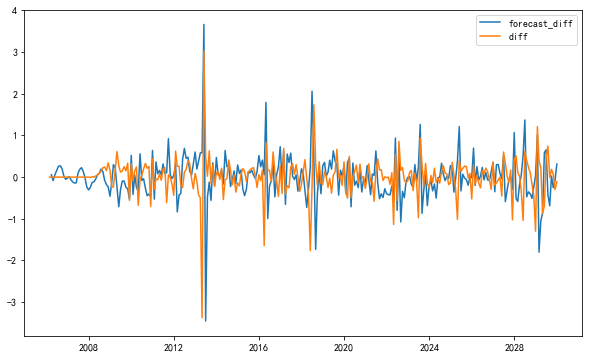

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(predictions_ARIMA_diff,label="forecast_diff")
plt.plot(ii["NPP"].diff(1).iloc[1:],label="diff")
plt.legend()
plt.show()


In [182]:
predictions = [i + j for i, j in zip(list(predictions_ARIMA_diff), list(ii['NPP'])[1:])]
prediction_sales = {
    "date":ii["NPP"].diff(1).index[2:],
    "NPP":predictions
}
prediction_sales = pd.DataFrame(prediction_sales)
prediction_sales['date'] = pd.to_datetime(prediction_sales['date']) 
#df[''date]数据类型为“object”，通过pd.to_datetime将该列数据转换为时间类型，即datetime。 
prediction_sales = prediction_sales.set_index(['date'], drop=True)    
#将日期设置为索引
prediction_sales.head()


,NPP
date,
2006-03-31,0.058292
2006-04-30,-0.082739
2006-05-31,0.057335
2006-06-30,0.156362
2006-07-31,0.260194


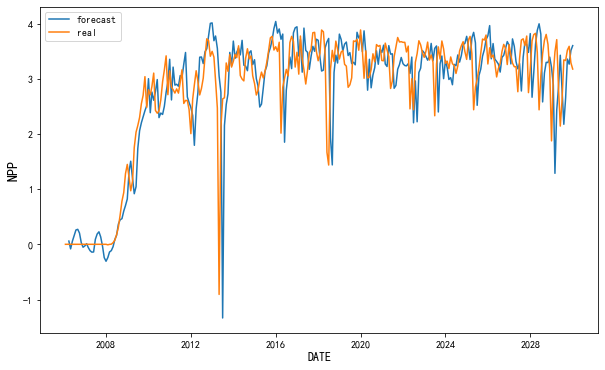

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_sales,label="forecast")
plt.plot(ii['NPP'],label="real")
plt.xlabel('DATE',fontsize=12,verticalalignment='top')
plt.ylabel('NPP',fontsize=14,horizontalalignment='center')
plt.legend()
plt.show()



              AC          Q  Prob(>Q)
to lag                               
6.0     0.059270   1.916711  0.927197
12.0    0.077617   5.743500  0.928456
18.0    0.065244  11.193814  0.885952
24.0   -0.054088  15.131879  0.916840


c:\Users\new\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


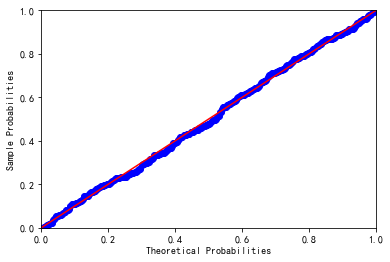

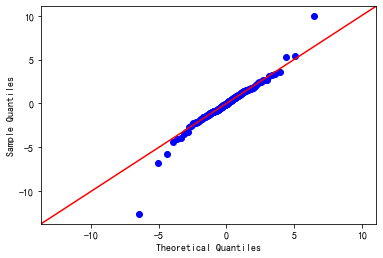

c:\Users\new\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


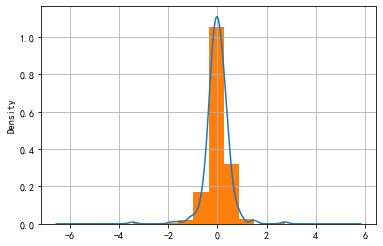

In [188]:
# 如果ARMA模型估计的好，应当使得估计值后的残差项是白噪声。下面对模型的残差项进行白噪声检验：
resid=model.resid
r,q,p=sm.tsa.acf(resid.values.squeeze(),qstat=True)
mat_res=np.c_[range(1,41),r[1:],q,p] #np.c_是按行连接两个矩阵，把两矩阵左右相加，要求行数相等，类似pandas的merge()
table=pd.DataFrame(mat_res,columns=['to lag','AC','Q','Prob(>Q)'])
LB_result_res=table.iloc[[5,11,17,23]]
LB_result_res.set_index('to lag',inplace=True)
print(LB_result_res)
## high prob means that we do not reject H0 which is resid is white noise means the model is good 

# pp plot
import scipy.stats as stats
sm.ProbPlot(resid, stats.t,fit=True).ppplot(line='45')
sm.ProbPlot(resid, stats.t,fit=True).qqplot(line='45')
plt.show()
#qq polt
plt.figure()
x=pd.Series(resid)
p1=x.plot(kind='kde')   
p2=x.hist(normed=True)
plt.grid(True)
plt.show()
